<a href="https://colab.research.google.com/github/guilpassos/Fuctura_Data_Science/blob/main/Neurais_com_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as lf
import tensorflow.keras as keras

In [11]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
titanic = sns.load_dataset('titanic')

features_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic.dropna(subset=features_names, inplace=True)

x = titanic[features_names].to_numpy()
y = titanic['survived'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.25, random_state=123)

In [5]:
print('Tamanho de x_train: ', x_train.shape)
print('Tamanho de x_test: ', x_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de x_train:  (535, 4)
Tamanho de x_test:  (179, 4)
Tamanho de y_train:  (535,)
Tamanho de y_test:  (179,)


In [13]:
model = keras.models.Sequential() #Cria uma rede neural sequencial - feed foward
model.add(keras.layers.Dense(4, activation='relu', input_shape=x_train[0].shape)) #primeira hidden
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation= 'sigmoid')) #outtput layer com ativacao

model.summary()                        

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss=keras.losses.binary_focal_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [19]:
batch_size = 32 #x_train 535 / 32 = 16.71 (entao sao 17 batches de 32)
epochs = 100

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/100
17/17 [==============================] - 1s 13ms/step - loss: 12.8019 - accuracy: 0.4411 - val_loss: 8.8635 - val_accuracy: 0.3966
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 11.6451 - accuracy: 0.4542 - val_loss: 7.3766 - val_accuracy: 0.4134
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 9.2039 - accuracy: 0.4636 - val_loss: 5.9744 - val_accuracy: 0.4469
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 9.6189 - accuracy: 0.4729 - val_loss: 4.7805 - val_accuracy: 0.4916
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 8.3014 - accuracy: 0.4935 - val_loss: 3.9141 - val_accuracy: 0.5754
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 7.9206 - accuracy: 0.5495 - val_loss: 3.4257 - val_accuracy: 0.6313
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 7.4695 - accuracy: 0.5364 - val_loss: 3.1092 - val_accuracy: 0.6872
Epoch 8/10

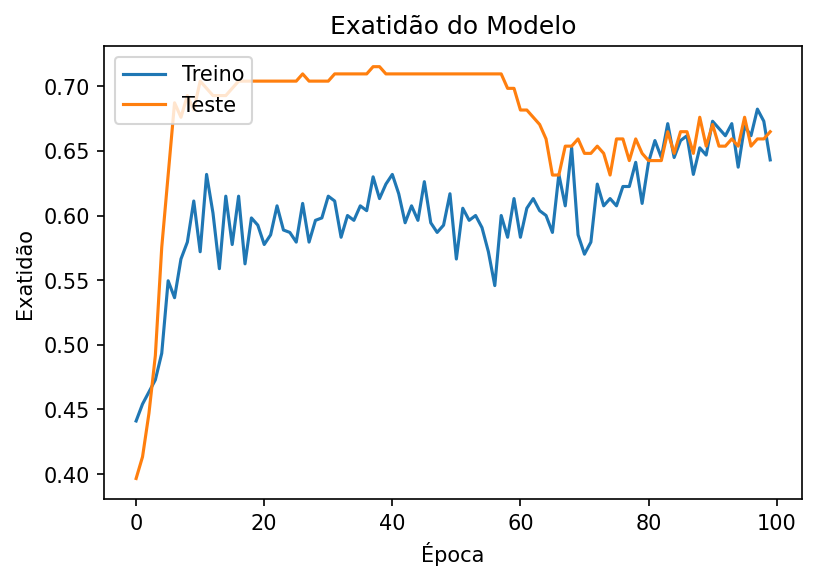

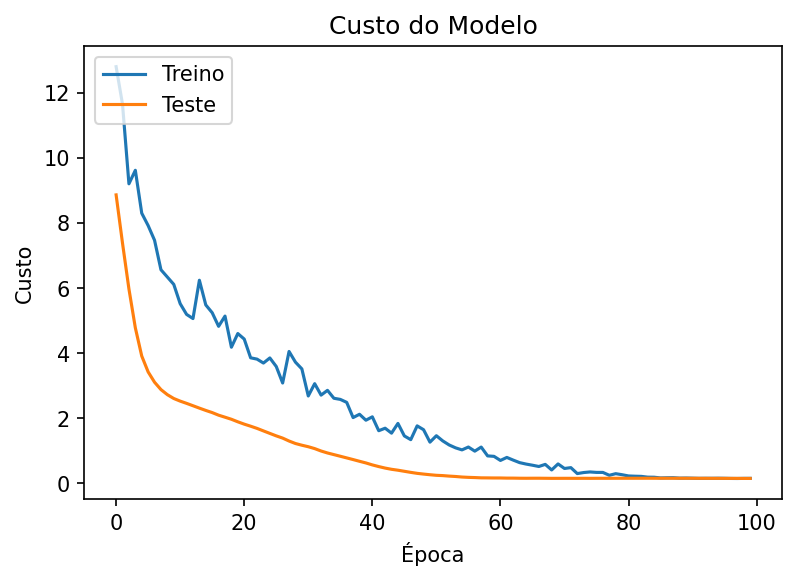

In [20]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.dpi'] = 150

# Plot acurácia de treino e validacao
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exatidão do Modelo')
plt.ylabel('Exatidão')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

# Plot custo de treino e validacao
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Custo do Modelo')
plt.ylabel('Custo')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()


In [21]:
model.evaluate(x_test, y_test)

# x_test 179 / 32 = 5.59 (entao sao 6 batches de 32)

6/6 [==============================] - 0s 2ms/step - loss: 0.1540 - accuracy: 0.6648


[0.15400630235671997, 0.6648044586181641]

## **Fazer previsões com o modelo**

- model.predict(x_new) para obter uma probabilidade float entre 0 e 1
- (model.predict(x_test) > 5).astype('int32')


In [23]:
(model.predict(x_test) > 0.5).astype('int32')

6/6 [==============================] - 0s 2ms/step


array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    